# Shrinath Sutar

## Technical TASK 4 :- Exploratory Data Analysis - Terrorism
### The Sparks Foundation Internship Program
### Data Science & Business Analytics Internship Task_4
In this task, we will be performing exploratory data analysis on the dataset "GlobalTerrorism" and try to find out the hot zone of terrorism. Also, we will derive the security issues and various insights.

## Step 0: Importing the Libraries 

In [158]:
# Importing all the libraries needed in this notebook
import math
import warnings
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Step 1 : Loading and Reading The Data Set

In [215]:
df = pd.read_csv('globalterrorism.csv')

In [216]:
df.head() # first five values of the dataset

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [161]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [163]:
# renaming the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

## Step 2 : Dropping out irrelevant columns

In [164]:
# Important data for further processing
df = df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [165]:
df.head() 

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [166]:
# Checking for the null values 
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

## Step 3 : Checking the dataset's information

In [167]:
df.info() # Returns the concise summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [168]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


## Step 4 : Data Visualization

## Destructive Features

In [169]:
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [170]:
df['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

## Terrorist Activities Each Year

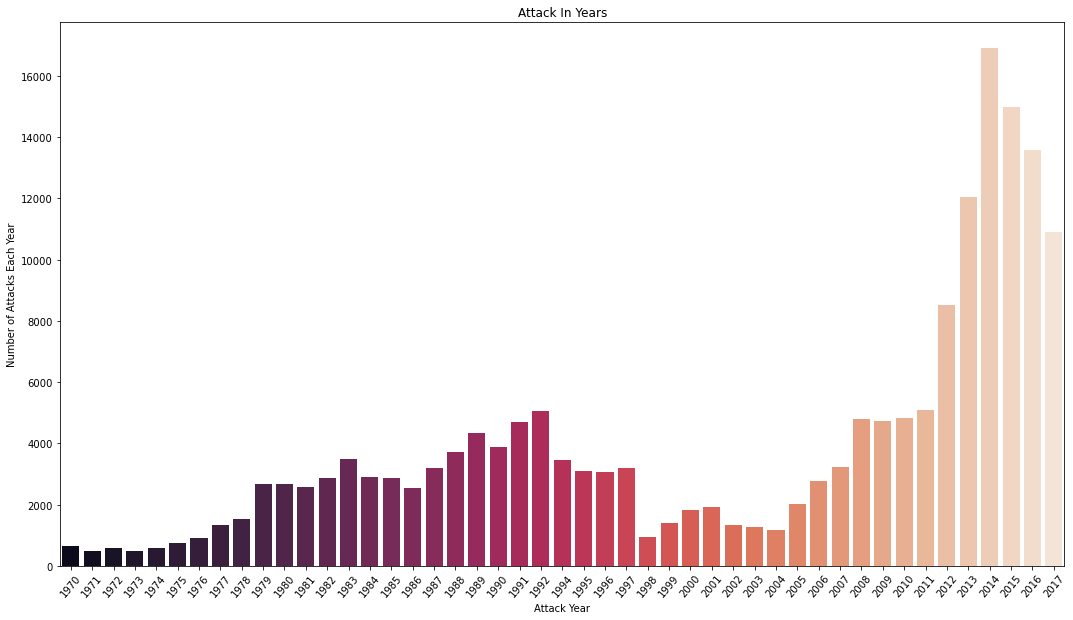

In [171]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 50)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks Each Year')
plt.title('Attack In Years')
plt.show()

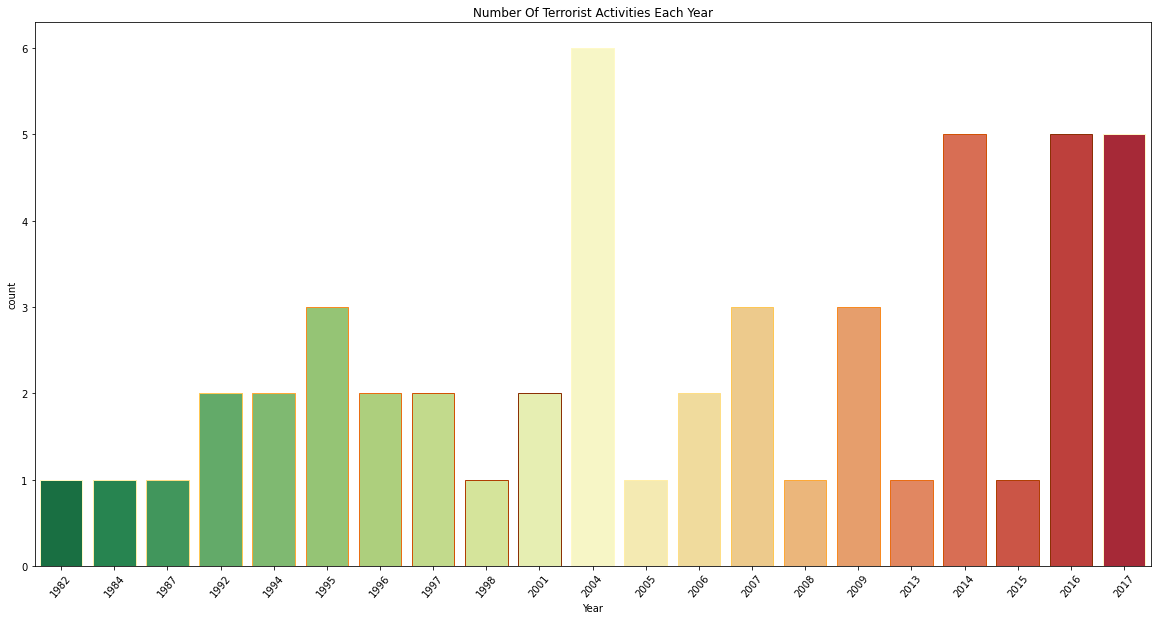

In [211]:
plt.subplots(figsize=(20,10))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=50)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

## Terrorist Activities By Region In Each Year 

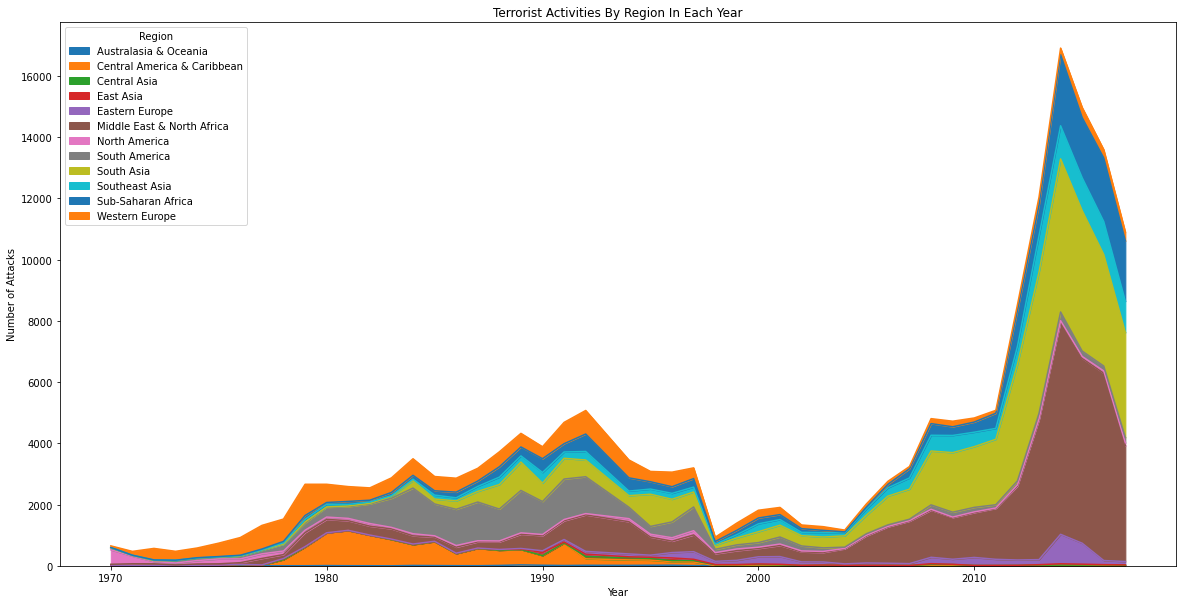

In [176]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [177]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['Casualities'] = df['Killed'] + df['Wounded']

In [212]:
# Top 50 worst terrorist attacks
df = df.sort_values(by='Casualities',ascending=False)[:50] 

In [213]:
heat=df.pivot_table(index='Country',columns='Year',values='Casualities')
heat.fillna(0,inplace=True)

In [214]:
heat.head()

Year,1982,1984,1987,1992,1994,1995,1996,1997,1998,2001,...,2005,2006,2007,2008,2009,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0,0.0
Egypt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,438.0
Ethiopia,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, 'skyblue'], [1, 'red']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 50 Worst Terror Attacks in History between 1982 & 2017',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [182]:
df.Country.value_counts()[:21]

Iraq             14
United States     5
Spain             4
Japan             3
Rwanda            2
Syria             2
Afghanistan       2
Sri Lanka         2
Pakistan          1
Tajikistan        1
Iran              1
Somalia           1
Kenya             1
Mozambique        1
Libya             1
South Sudan       1
Russia            1
France            1
Nepal             1
Chad              1
Egypt             1
Name: Country, dtype: int64

## Top Countries Affected By Terrorist Attacks

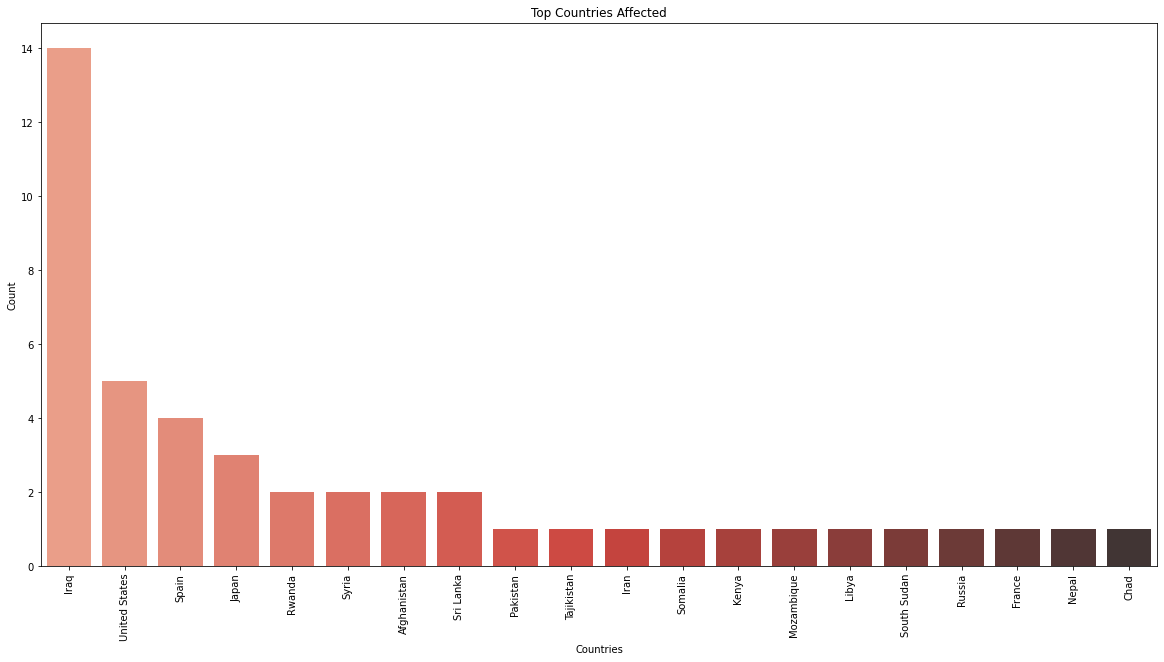

In [183]:
plt.subplots(figsize=(20,10))
sns.barplot(df['Country'].value_counts()[:20].index,df['Country'].value_counts()[:20].values,palette='Reds_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

## Terrorist's Origanizations Operations In Each Country

In [184]:
df.Group.value_counts()[1:20]

Unknown                                                                      7
Islamic State of Iraq and the Levant (ISIL)                                  7
Al-Qaida in Iraq                                                             3
Islamic State of Iraq (ISI)                                                  3
Hutu extremists                                                              2
Liberation Tigers of Tamil Eelam (LTTE)                                      2
Aum Shinri Kyo                                                               2
Khorasan Chapter of the Islamic State                                        2
Anti-Government extremists                                                   2
Riyadus-Salikhin Reconnaissance and Sabotage Battalion of Chechen Martyrs    1
Al-Shabaab                                                                   1
Sudan People's Liberation Movement in Opposition (SPLM-IO)                   1
Rebels                                              

In [185]:
test = df[df.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [186]:
test.Country.unique()

array(['Iraq', 'Afghanistan', 'Syria'], dtype=object)

In [187]:
global_terror_df_group = df.dropna(subset=['latitude','longitude'])

In [188]:
global_terror_df_group = global_terror_df_group.drop_duplicates(subset=['Country','Group'])

In [189]:
terrorist_groups = df.Group.value_counts()[1:8].index.tolist()
global_terror_df_group = global_terror_df_group.loc[global_terror_df_group.Group.isin(terrorist_groups)]
print(global_terror_df_group.Group.unique())

['Aum Shinri Kyo' 'Islamic State of Iraq and the Levant (ISIL)'
 'Liberation Tigers of Tamil Eelam (LTTE)' 'Hutu extremists'
 'Al-Qaida in Iraq' 'Unknown' 'Islamic State of Iraq (ISI)']


In [190]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
73126,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1384,8190,Passengers and crew members on American Airlin...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
73127,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1383,8191,Passengers and crew members on United Airlines...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
58841,1995,3,20,Japan,Tokyo,East Asia,Tokyo,35.689125,139.747742,Unarmed Assault,13,5500,Subway system,NaN,Aum Shinri Kyo,Transportation,Chemical,NaN,5513
68071,1998,8,7,Kenya,Nairobi,Sub-Saharan Africa,Nairobi,-1.285180,36.821107,Bombing/Explosion,224,4000,"United States Embassy in Nairobi, Kenya",08/07/1998: Suicide attackers detonated a vehi...,Al-Qaida,Government (Diplomatic),Explosives,Unknown,4224
133518,2014,6,12,Iraq,Saladin,Middle East & North Africa,Tikrit,34.621521,43.668377,Hostage Taking (Kidnapping),1570,0,Soldiers,06/12/2014: Assailants abducted approximately ...,Islamic State of Iraq and the Levant (ISIL),Military,Firearms,The Islamic State of Iraq and the Levant (ISIL...,1570


In [191]:
# Total Number of people killed in terror attack
killData = df.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 14735


In [192]:
# Let's look at what types of attacks these deaths were made of.
attackData = df.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [193]:
typeKillData.head()

,AttackType,Killed
73126,Hijacking,1384
73127,Hijacking,1383
58841,Unarmed Assault,13
68071,Bombing/Explosion,224
133518,Hostage Taking (Kidnapping),1570


In [194]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Bombing/Explosion,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault
Killed,4071,3724,2767,344,3809,20


In [195]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int32
 1   Bombing/Explosion                    1 non-null      int32
 2   Hijacking                            1 non-null      int32
 3   Hostage Taking (Barricade Incident)  1 non-null      int32
 4   Hostage Taking (Kidnapping)          1 non-null      int32
 5   Unarmed Assault                      1 non-null      int32
dtypes: int32(6)
memory usage: 140.0+ bytes


In [207]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
73126,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1384,8190,Passengers and crew members on American Airlin...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
73127,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1383,8191,Passengers and crew members on United Airlines...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
58841,1995,3,20,Japan,Tokyo,East Asia,Tokyo,35.689125,139.747742,Unarmed Assault,13,5500,Subway system,NaN,Aum Shinri Kyo,Transportation,Chemical,NaN,5513
68071,1998,8,7,Kenya,Nairobi,Sub-Saharan Africa,Nairobi,-1.285180,36.821107,Bombing/Explosion,224,4000,"United States Embassy in Nairobi, Kenya",08/07/1998: Suicide attackers detonated a vehi...,Al-Qaida,Government (Diplomatic),Explosives,Unknown,4224
133518,2014,6,12,Iraq,Saladin,Middle East & North Africa,Tikrit,34.621521,43.668377,Hostage Taking (Kidnapping),1570,0,Soldiers,06/12/2014: Assailants abducted approximately ...,Islamic State of Iraq and the Levant (ISIL),Military,Firearms,The Islamic State of Iraq and the Levant (ISIL...,1570


In [197]:
# Number of Killed in Terrorist Attacks by Countries
countryData = df.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [198]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Algeria,Chad,Egypt,Ethiopia,France,India,Iran,Iraq,Japan,...,Pakistan,Russia,Rwanda,Somalia,South Sudan,Spain,Sri Lanka,Syria,Tajikistan,United States
Killed,333,256,160,311,200,87,188,60,4901,20,...,91,344,1451,588,287,191,151,950,0,2994


In [199]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

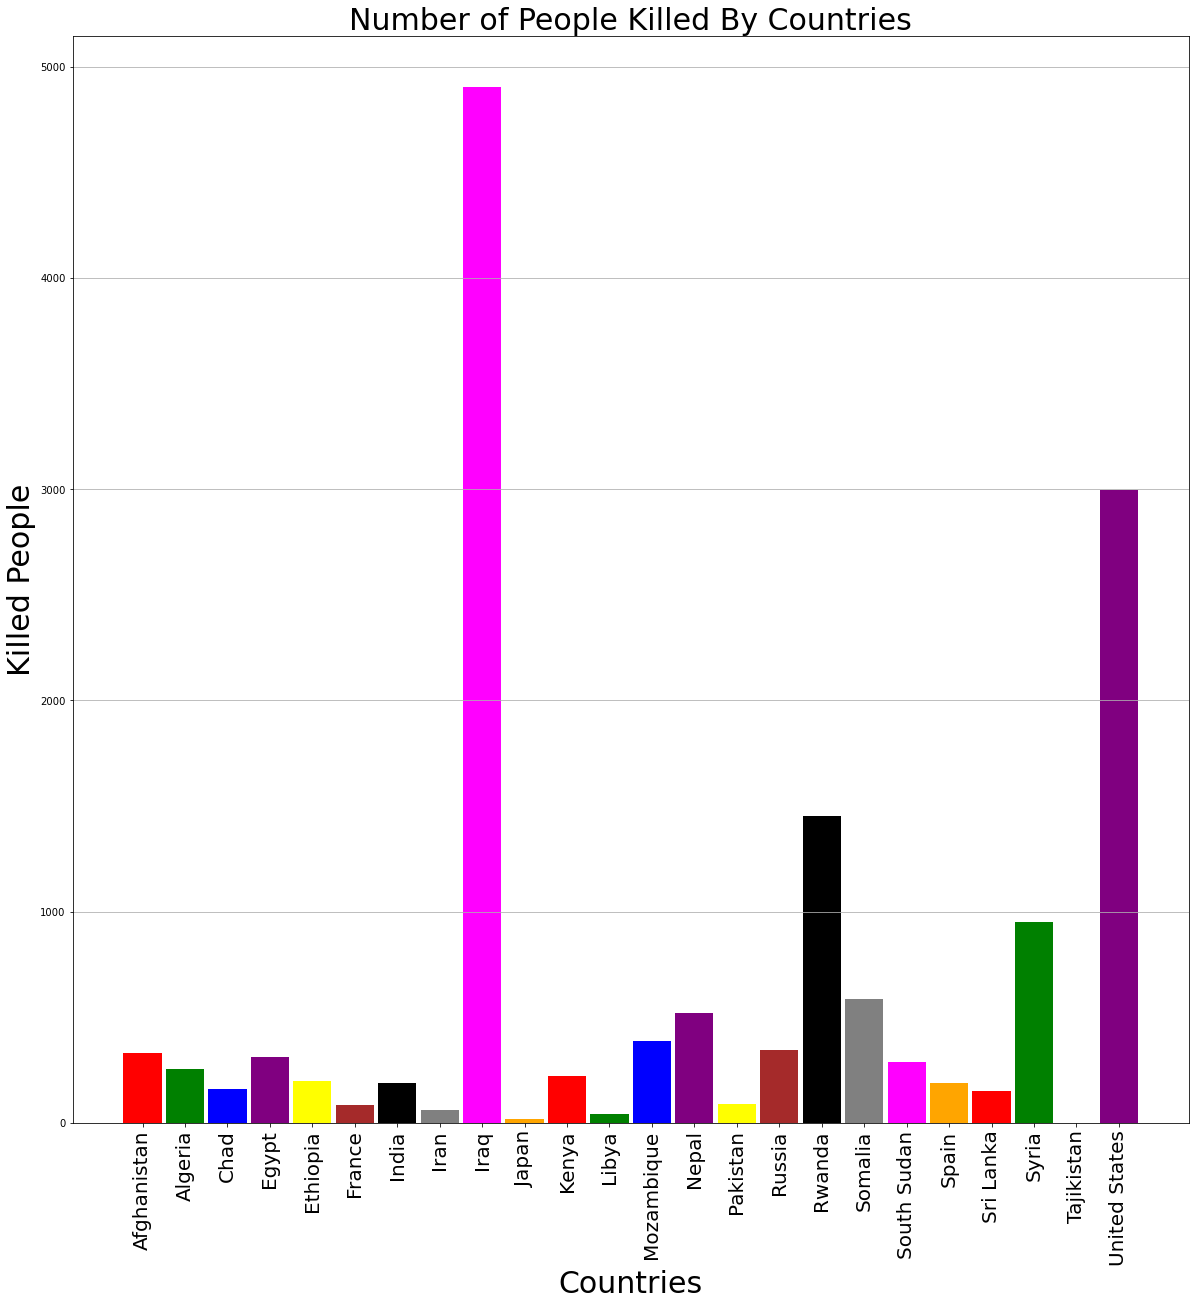

In [204]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=30)
plt.xlabel('Countries', fontsize = 30)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number of People Killed By Countries', fontsize = 30)
# print(fig_size)
plt.show()


### CONCLUSIONS :

##### From the above analysis , we can get to know that the countries where most people got killed are : Afghanisthan, Columbia, Iran, Sri lanka, Syria, Somalia, Yemen naming a few. Even though there is a perception that Muslims are supporters of terrorism, but Muslims are the people who are most damaged by terrorist attacks.

**So after different type of analyzation ,Overall terrorism is suddenly increased from 2010 and I have ranked the Hot zone in terms of terrorist activities in all regions -**



### THANK YOU!! 